# high name_email_similarity is indicative of lower fraud rates

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pointbiserialr
import scipy.stats as stats


# Read the CSV file into a DataFrame
df = pd.read_csv('undersampled_data.csv')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65970 entries, 0 to 65969
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        65970 non-null  int64  
 1   income                            65970 non-null  float64
 2   name_email_similarity             65970 non-null  float64
 3   prev_address_months_count         65970 non-null  int64  
 4   current_address_months_count      65970 non-null  int64  
 5   customer_age                      65970 non-null  int64  
 6   days_since_request                65970 non-null  float64
 7   intended_balcon_amount            65970 non-null  float64
 8   payment_type                      65970 non-null  object 
 9   zip_count_4w                      65970 non-null  int64  
 10  velocity_6h                       65970 non-null  float64
 11  velocity_24h                      65970 non-null  float64
 12  velo

Mean name_email_similarity for fraud cases: 0.39348950535552996
Mean name_email_similarity for legitimate cases: 0.49578328507522235


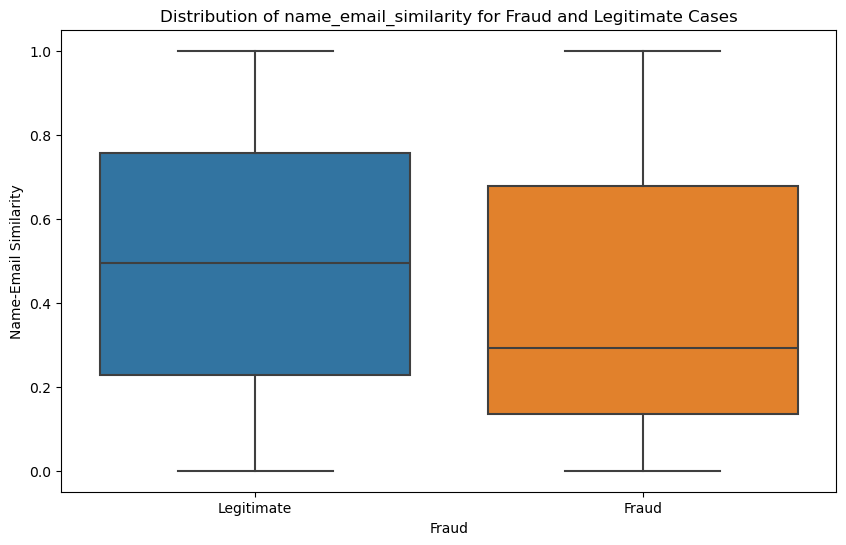

T-Statistic: -33.77267986723434
P-Value: 6.5570763222410456e-248
Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.


In [48]:
fraud_mean_similarity = df[df['fraud_bool'] == 1]['name_email_similarity'].mean()
legit_mean_similarity = df[df['fraud_bool'] == 0]['name_email_similarity'].mean()

print("Mean name_email_similarity for fraud cases:", fraud_mean_similarity)
print("Mean name_email_similarity for legitimate cases:", legit_mean_similarity)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='name_email_similarity', data=df)
plt.title('Distribution of name_email_similarity for Fraud and Legitimate Cases')
plt.xlabel('Fraud')
plt.ylabel('Name-Email Similarity')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

# Statistical Testing
t_stat, p_value = ttest_ind(df[df['fraud_bool'] == 1]['name_email_similarity'],
                             df[df['fraud_bool'] == 0]['name_email_similarity'])

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in name_email_similarity between fraud and legitimate cases.")


In [49]:
# the significant difference in name_email_similarity between fraud and legitimate cases suggest that 'name_email_similarity' is an important feature as an indication of fraud.
#the significantly lower mean name_email_similarity for fraud cases compared to legitimate cases supports the hypothesis that higher name_email_similarity may indicate lower fraud rates.
#this implies that there may be a pattern or correlation between lower name_email_similarity and fraudulent behavior, suggesting that applicants with higher name-email dissimilarity may be more likely to engage in fraudulent activities

In [50]:
# test for normality of predictive features

# check normality for fraudulent cases
stat_fraud, p_fraud = shapiro(df[df['fraud_bool'] == 1]['name_email_similarity'])
print("Shapiro-Wilk test for fraud cases:")
print("Statistic:", stat_fraud)
print("P-Value:", p_fraud)

# check normality for legitimate cases
stat_legit, p_legit = shapiro(df[df['fraud_bool'] == 0]['name_email_similarity'])
print("\nShapiro-Wilk test for legit cases:")
print("Statistic:", stat_legit)
print("P-Value:", p_legit)

Shapiro-Wilk test for fraud cases:
Statistic: 0.8983161449432373
P-Value: 0.0

Shapiro-Wilk test for legit cases:
Statistic: 0.9466801285743713
P-Value: 0.0


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
# things to note:
# Shapiro-Wilk test may not be accurate since sample size is > 5000

# suppose choose significance level = 0.05 
# p value for both fraud and legit cases are very small, less than significance level
# cannot assume distribution of 'name_email_similarity' for both cases is normal - so using t-test is not accurate


# # alternative is use feature engineering
# create categorical bins using 'name_email_similarity'and visualize the distribution of the new categorical feature for fraud and legit cases
# transform the continuous name_email_similarity feature into a categorical feature

In [55]:
# since 'name_email_similarity' not normal, use Mann-Whitney U test to check

# Perform Mann-Whitney U test

fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]
statistic, p_value = mannwhitneyu(fraudulent_accounts['name_email_similarity'], 
                                   legitimate_accounts['name_email_similarity'])

print("Mann-Whitney U Test Statistic:", statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in name_email_similarity between fraud and legitimate cases.")


Mann-Whitney U Test Statistic: 239716491.0
P-Value: 1.0884251073893012e-257
Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.


In [66]:
# strong evidence against null hypothesis that there is no difference in name_email_similarity between fraudulent and legitimate accounts.
# p value small < 0.05  means that there is sufficient evidence to conclude that there is a significant difference in name_email_similarity between fraudulent and legitimate cases.


In [54]:
#  test the association between name_email_similarity and fraud_bool


name_email_similarity = df['name_email_similarity']
fraud = df['fraud_bool']

# Calculate point biserial correlation coefficient and its p-value
correlation_coefficient, p_value = pointbiserialr(name_email_similarity, fraud)

print("Point Biserial Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Point Biserial Correlation Coefficient: -0.1303696362133764
p-value: 6.557076335889639e-248


In [65]:
# correlation coefficient suggests a negative correlation between name_email_similarity and the likelihood of fraud
# negative value indicates as name_email_similarity increases, there is tendency for fraud to be less likely

# p value extremely small indicating strong evidence against the null hypothesis that there is no correlation between name_email_similarity and fraud

# results suggests that name_email_similarity may have some influence on fraud

# use feature engineering, implement new column 'name_email_similarity_bins' to test the association with fraud occurences

/tmp/ipykernel_51749/3300637608.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportions = df.groupby('name_email_similarity_bins')['fraud_bool'].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


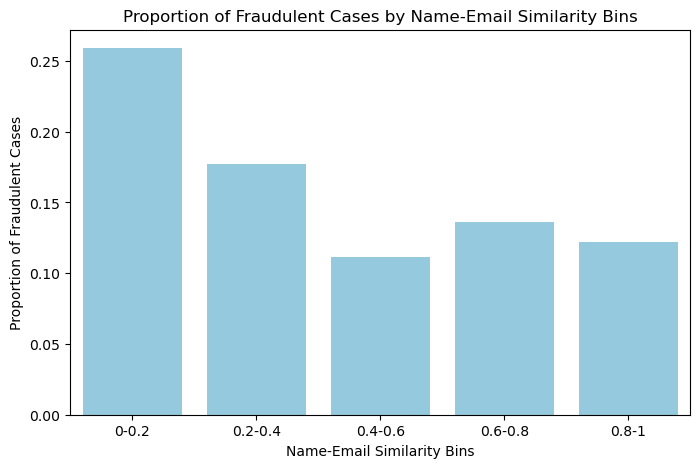

Chi-square Statistic: 1544.5049123369665
P-Value: 0.0


In [64]:
# specify the bin edges
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]  

# define bin labels
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=bin_edges, labels=bin_labels)

# calculate the proportion of fraudulent cases within each similarity bin
fraud_proportions = df.groupby('name_email_similarity_bins')['fraud_bool'].mean()

# plot the proportion of fraudulent cases by similarity bin
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_proportions.index, y=fraud_proportions.values, color='skyblue')
plt.title('Proportion of Fraudulent Cases by Name-Email Similarity Bins')
plt.xlabel('Name-Email Similarity Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.show()

# statistical testing using Chi-square test
contingency_table = pd.crosstab(df['name_email_similarity_bins'], df['fraud_bool'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p)

In [24]:
# to note:
# proportion of fraud in each bin = number of fraud accs in the bin / total number of accs in the bin


# the high chi-square value indicates a larger discrepancy between the observed and expected frequencies, suggesting a stronger association between name_email_similarity_bins and fraud occurrence.

# low p-value suggest strong evidence indicating that the observed association between name_email_similarity_bins and fraud occurrence is unlikely to be due to random chance.

# results provide strong evidence that there is a significant association between the level of name-email similarity and the likelihood of fraud occurrence. 
# the proportion of fraudulent cases varies significantly across different similarity bins
# this supports the hypothesis that high name_email_similarity is indicative of lower fraud rates.

In [67]:
# statistical testing 
# Point-biserial correlation
corr_coeff, p_val = pointbiserialr(df['name_email_similarity_bins'].cat.codes, df['fraud_bool'])

print("Point-Biserial Correlation Coefficient:", corr_coeff)
print("P-Value:", p_val)

alpha = 0.05
if p_val < alpha:
    if corr_coeff > 0:
        print("Positive association: Larger name email similarity are associated with a higher proportion of fraudulent cases.")
    else:
        print("Negative association: Larger name email similarity are associated with a lower proportion of fraudulent cases.")
else:
    print("No significant association found.")

Point-Biserial Correlation Coefficient: -0.12933706297597944
P-Value: 5.33902387921767e-244
Negative association: Larger name email similarity are associated with a lower proportion of fraudulent cases.


In [68]:
# this supports the hypothesis that high name_email_similarity is indicative of lower fraud rates.

In [59]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,name_email_similarity_bins
0,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,0,1500.0,0,INTERNET,4.036394,windows,1,1,0,0.4-0.6
1,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,0,1500.0,0,INTERNET,12.928072,windows,0,1,0,0.8-1
2,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,0,1500.0,0,INTERNET,2.550167,linux,0,1,0,0.6-0.8
3,1,0.7,0.090000,-1,58,50,0.004134,-1.000000,AD,4011,...,0,1500.0,0,INTERNET,3.500856,windows,0,1,0,0-0.2
4,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0.8-1


# test the effectiveness of using name_email_similarity and credit_risk_score as important predictor for fraud detection and prevention strategies.

/tmp/ipykernel_51749/3949835451.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'name_email_similarity_bins'])['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


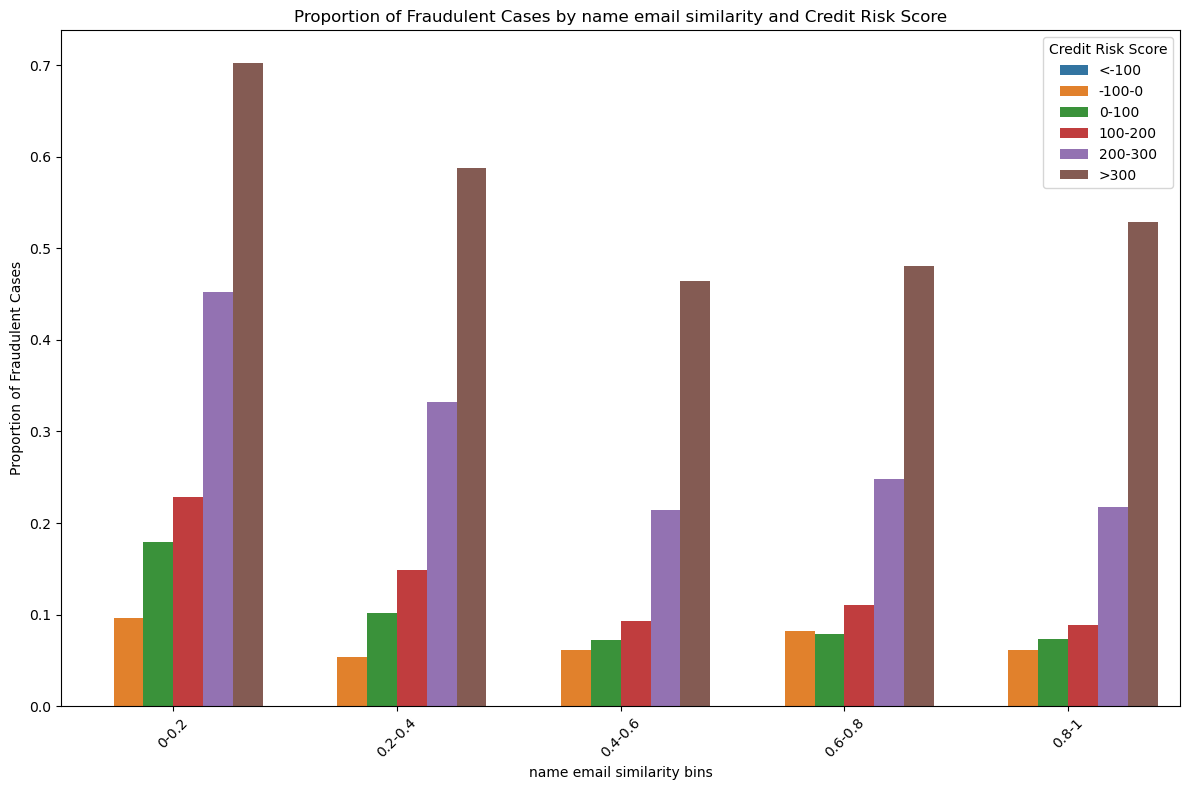

In [60]:
# 'name_email_similarity' and 'credit_risk_score' with fraud occurence


# Define name_email_similarity bins
name_email_similarity_bins = pd.cut(df['name_email_similarity'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                              labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])


# Add session length bins to the DataFrame
df['name_email_similarity_bins'] = name_email_similarity_bins

# Manually select intervals for credit risk score bins
credit_risk_score_bins = pd.cut(df['credit_risk_score'], bins=[-176, -100, 0, 100, 200, 300, 400],
                                labels=['<-100', '-100-0', '0-100', '100-200', '200-300', '>300'])



# Add credit risk score bins to the DataFrame
df['credit_risk_score_bins'] = credit_risk_score_bins

# Group by credit risk score and session length bins, calculate proportion of fraudulent cases
fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'name_email_similarity_bins'])['fraud_bool'].mean().reset_index()

# Plot the relationship between session length bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='name_email_similarity_bins', y='fraud_bool', hue='credit_risk_score_bins', data=fraud_proportion_by_bin)
plt.title('Proportion of Fraudulent Cases by name email similarity and Credit Risk Score')
plt.xlabel('name email similarity bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()

In [ ]:
# consistent with above findings
# lower name email similarity likely to be fraud
# higher credit risk score is indicative of higher fraud occurences

# possible reasons to explain this pattern

In [27]:
# 1. higher similarity between a name and an email address, could indicate a lower level of anonymity
# so fraudsters often prefer anonymity to avoid detection
# so for individuals that use more coherent or identifiable information, may indicate less inclination to engage in fraudulent activities

# 2. legit applicants are more likely to provide accurate and consistent information (name and email address). Hence, higher name_email_similarity could indicate genuine information, which reduces the likelihood of fraud activity.

# 3. Bots can be used to mass spam fraud applications so likely emails and names are randomly generated by bots, hence lower name email similarity
